In [1]:
#introduce a little comment for GIT
import math

In [2]:
import numpy as np

In [3]:
import numpy.random as npr

In [4]:
from pylab import plt, mpl

In [5]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

C:\Users\User\AppData\Local\Temp\ipykernel_4276\2133761631.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Random Numbers

In [6]:
npr.seed(100)
np.set_printoptions(precision=4)

In [7]:
type(npr.rand(10))

numpy.ndarray

In [8]:
npr.rand(10)

array([0.8913, 0.2092, 0.1853, 0.1084, 0.2197, 0.9786, 0.8117, 0.1719,
       0.8162, 0.2741])

In [9]:
a = 5 #Lower limit
b = 10 #upper limit
npr.rand(10) * (b - a) + a #for the transformation to anbother interval

array([7.1585, 9.7001, 9.0882, 6.6806, 5.8771, 6.8642, 5.0284, 6.2621,
       8.9783, 5.0763])

In [10]:
#created for 2 dimensions
npr.rand(5,5) * (b - a) + a

array([[7.9942, 8.019 , 5.5257, 6.9097, 5.1824],
       [9.4521, 9.9046, 5.2997, 9.4527, 7.8845],
       [8.7124, 8.1509, 7.9092, 5.1022, 6.0501],
       [7.7234, 8.8456, 6.2535, 6.4295, 9.262 ],
       [9.875 , 9.4243, 6.7975, 7.9943, 6.774 ]])

In [11]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)
rn2 = npr.randint(0,10,sample_size)
rn3 = npr.sample(size=sample_size)

In [12]:
a = [0,25,50,75,100]

In [13]:
rn4 = npr.choice(a, size=sample_size)

Text(0.5, 1.0, 'choice')

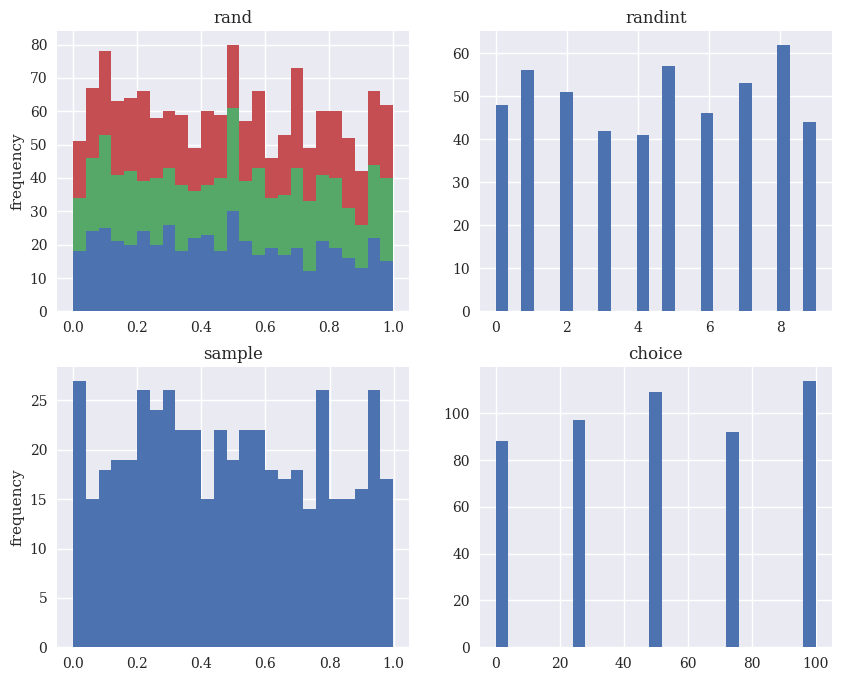

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(10, 8))
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('choice')

In [15]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)
rn2 = npr.normal(100, 20, sample_size)
rn3 = npr.chisquare(df=0.5, size=sample_size)
rn4 = npr.poisson(lam=1.0, size=sample_size)

Text(0.5, 1.0, 'Poisson')

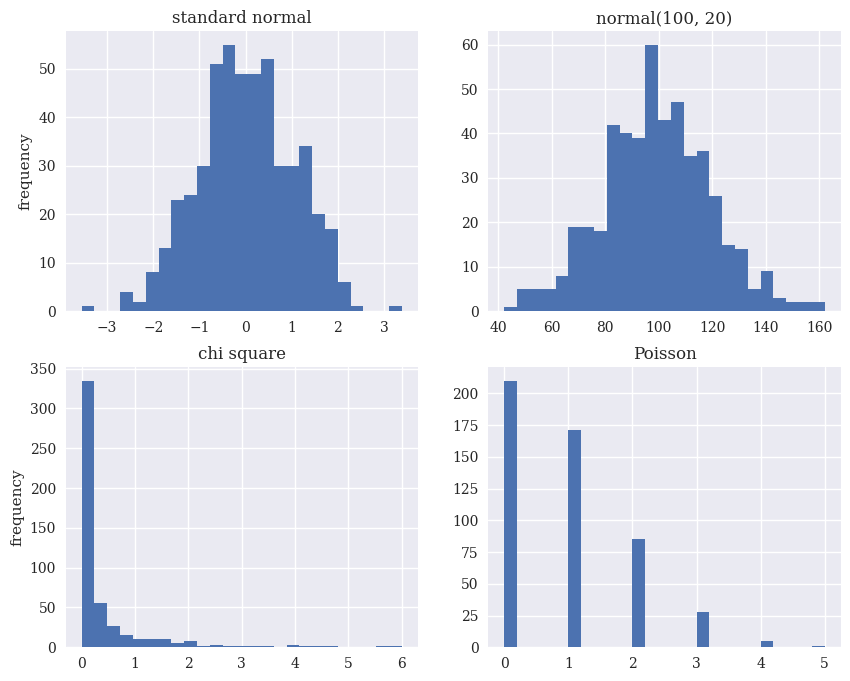

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(10, 8))
ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson')

with numnpy you can craete very large random datasets

# Simulation

In [21]:
#this is the black scholes merton setup to simulate the future index level
S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
I = 10000
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T + #this is the formula and the pervious variables all the parts of the formula
                  sigma * math.sqrt(T) * npr.standard_normal(I))
#this is the similation of the model

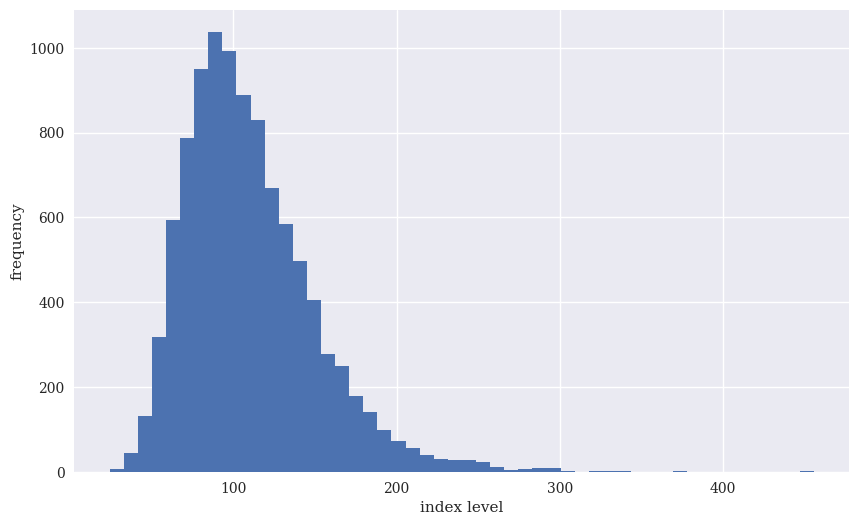

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

In [23]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
                         sigma * math.sqrt(T), size=I)

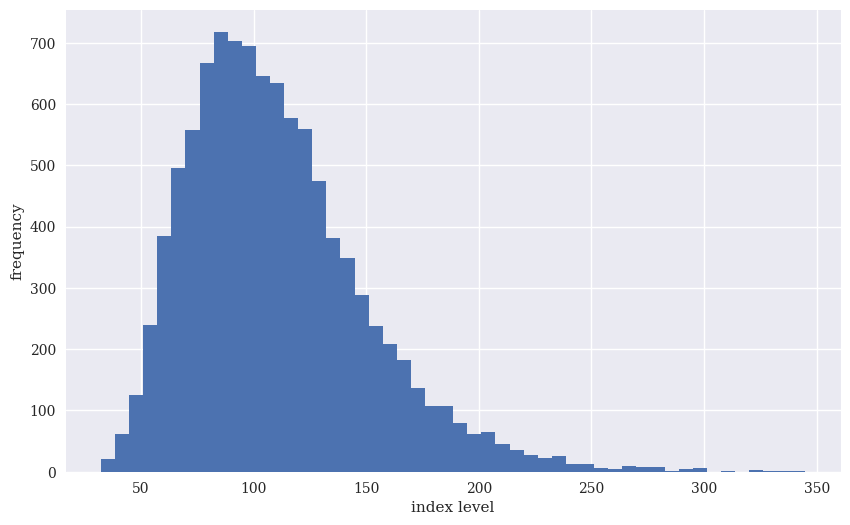

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

In [28]:
import scipy.stats as scs

To compare the distributional characteristics of simulation results

In [29]:
def print_statistics(a1, a2):
        # Prints selected statistics.

        # Parameters
        #=========
        #a1, a2: ndarray objects
        #    results objects from simulation
        #
        sta1 = scs.describe(a1)
        sta2 = scs.describe(a2)
        print('%14s %14s %14s' %
              ('statistic', 'data set 1', 'data set 2'))
        print(45 * "-")
        print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
        print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
        print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
        print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
        print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]),
                                      np.sqrt(sta2[3])))
        print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
        print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

In [30]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         24.143         32.187
           max        455.957        345.025
          mean        109.967        110.321
           std         39.768         39.676
          skew          1.178          1.040
      kurtosis          2.665          1.745


The differences are mainly due to what is called the sampling error in simulation. Another error can also be introduced when discretely simulating continuous stochastic processes—namely the discretization error, which plays no role here due to the static nature of the simulation approach

# Stocastic Processes

 stochastic process is a sequence of random variables. In that sense, one should expect something similar to a sequence of repeated simulations of a random variable when simulating a process.

ct that the draws are typically not independent but rather depend on the result(s) of the previous draw(s). In general, however, stochastic processes used in finance exhibit the Markov property, which mainly says that tomorrow’s value of the process only depends on today’s state of the process, and not any other more “historic” state or even the whole path history. The process then is also called memoryless.

In [31]:
# Interesting but not really that relvant to anyhting i'm currently into
